## Regression : 

#### Resudials : 
Bizim gerçek değerlerimiz ile tahminlerimiz arasında ki farklara denir. Tahminler büyükse çizginin üst kısmında kalır yani pozitif küçükse negatiftir. e = y - yi olarak ifade edilir. Patern çizgi üzerinde data verileri normal dağılım da değil ise linear regression da hatayı yüksek alırız. uygun değildir. Normal dağılıma ne kadar yakınsa o kadar iyi sonuçla alırız bu linear regression için geçerlidir. Dağılım üçgen şeklinde de olmayacak olursa o zaman logaritması alınmalı. 

### Eror Metricler : 

#### Mean absolute eror : 
|y - yi|.sum()/n formulu ile bulunur. gerçek değerlerden tahminler çıkarılır ama mutlak değeri alınarak sonra n eleman sayısına bölünür. bu şeklide elde edilen skordur. 

#### Mean Squared Error : 
((y - yi)**2).sum() / n formulu ile bulunur. hataların varyansı da denir. 

#### Root Mean Squared Error : 
(((y - yi)**2).sum() / n) ** 0.5 formulu ile bulunur. hatanın standart sapması da denir. Mean Squared Error kareködür. en çok kullanılan metricdir. o yüzden diğer metriclerden daha çok kullanılır. çünkü karekökü alınarak varyans değerini cezalandırır.

## İmport Library : 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as sts
plt.rcParams["figure.figsize"] = (10,6) # tüm görsellerin aynı boyutta olması için sabitledik.
import warnings
warnings.filterwarnings("ignore") # verilen uyarıları notebook getirmesin.

In [2]:
df = pd.read_csv("Advertising.csv")
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [3]:
df.info()
# NaN değer yok ve tüm veri tipleri float

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


TV tablosunda toplamda = 0  adet aykırı alt veri vardır.
TV tablosunda toplamda = 0 adet aykırı üst veri vardır.
radio tablosunda toplamda = 0  adet aykırı alt veri vardır.
radio tablosunda toplamda = 0 adet aykırı üst veri vardır.
newspaper tablosunda toplamda = 0  adet aykırı alt veri vardır.
newspaper tablosunda toplamda = 2 adet aykırı üst veri vardır.


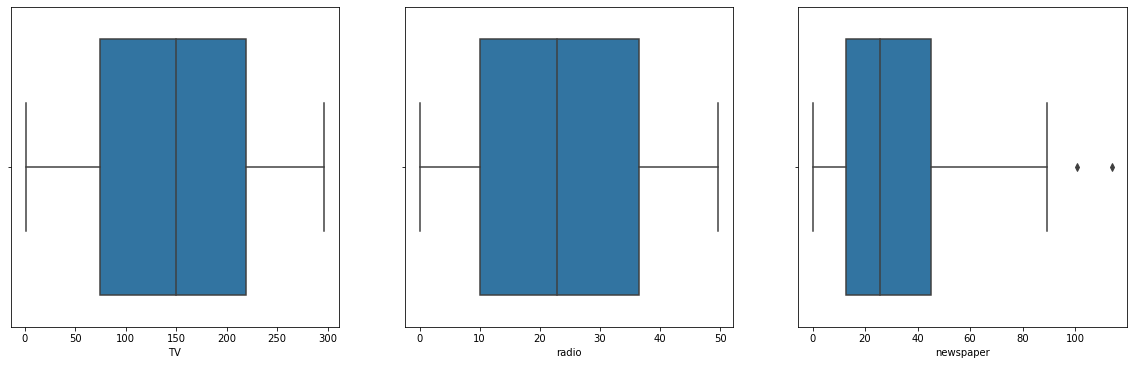

In [7]:
# Tüm sutunlar için Outlier değerlere baktık.
index = 0
plt.figure(figsize=(20,20))
for i in df.columns:
    if i != "sales":
        index += 1
        plt.subplot(3,3,index)
        sns.boxplot(df[i])
        Q1 =df[i].quantile(0.25)
        Q3 = df[i].quantile(0.75)
        IQR = Q3-Q1
        alt_sinir = Q1-(1.5*IQR)
        ust_sinir = Q3+(1.5*IQR)
        #print(f"{i} sutununun alt sınır değeri = {alt_sinir}")
        #print(f"{i} sutununun üst sınır değeri = {ust_sinir}")
        aykiri_alt = df[i] < alt_sinir
        aykiri_ust = df[i] > ust_sinir
        print(i, "tablosunda toplamda =", df[i][aykiri_alt].count()," adet aykırı alt veri vardır.")
        print(i, "tablosunda toplamda =",df[i][aykiri_ust].count(), "adet aykırı üst veri vardır.")

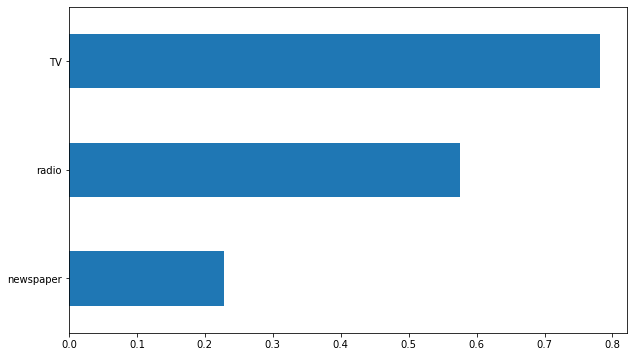

In [8]:
df.corr()["sales"].drop("sales").sort_values().plot.barh();
# sales targetimiz ile diğer futureler arasında ki korlasyon ilişkisi.

In [10]:
for i in df.drop(columns = "sales") : 
    print(f"sales ile {i} sutunumuzun korelasyon durumu : {df.sales.corr(df[i])}")

sales ile TV sutunumuzun korelasyon durumu : 0.7822244248616061
sales ile radio sutunumuzun korelasyon durumu : 0.5762225745710551
sales ile newspaper sutunumuzun korelasyon durumu : 0.22829902637616528


In [11]:
df.corr()
# MultiColinearty var mı yok mu

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


### Train Test Split : 

In [12]:
X = df.drop("sales", axis=1) # future
y = df["sales"] # target

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

### Default Linear Regression : 

In [19]:
from sklearn.linear_model import LinearRegression

In [23]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

### skor metricleri : 

In [20]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [22]:
def eval_metric(actual, pred):
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    rmse = np.sqrt(mean_squared_error(actual, pred))
    R2_score = r2_score(actual, pred)
    print("Model testing performance:")
    print("--------------------------")
    print(f"R2_score \t: {R2_score}")
    print(f"MAE \t\t: {mae}")
    print(f"MSE \t\t: {mse}")
    print(f"RMSE \t\t: {rmse}")

### standart scale : 

In [21]:
from sklearn.preprocessing import StandardScaler

In [25]:
scaler = StandardScaler()
X_train_scaler = scaler.fit_transform(X_train)
X_test_scaler = scaler.transform(X_test)
model2 = LinearRegression()
model2.fit(X_train_scaler, y_train)
y_pred2 = model2.predict(X_test_scaler)

### skorlara bakma : 

In [26]:
eval_metric(y_test, y_pred)
# scale etmeden %89 r2 skoru çıktı. doğru tahmin yapabilmek için doğru bilginin %89 ununa sahipim demektir. r2 scoru için.

Model testing performance:
--------------------------
R2_score 	: 0.8935163320163657
MAE 		: 1.4023124989385076
MSE 		: 2.8800237300941944
RMSE 		: 1.6970632663793634


In [35]:
mae1 = mean_absolute_error(y_test, y_pred)
mae1 / df["sales"].mean()
# yüzde 10 luk hatalı tahmin oranımız var.

0.10000445704678249

In [27]:
eval_metric(y_test, y_pred2)
# scale edince başarı oranımız. tüm skorlarımız aynı. 
# doğru tahmin yapabilmek için doğru bilginin %89 ununa sahipim demektir. r2 scoru için.

Model testing performance:
--------------------------
R2_score 	: 0.8935163320163658
MAE 		: 1.4023124989385065
MSE 		: 2.880023730094192
RMSE 		: 1.6970632663793628


In [36]:
mae2 = mean_absolute_error(y_test, y_pred2)
mae2 / df["sales"].mean()
# scale edilmiş değer için yüzde 10 luk hatalı tahmin oranımız var.

0.1000044570467824

In [28]:
### model için scale edilmden TV için 75, radio için 40, newspaper için 60 tl reklam verip ortalama kazancımızı tahmin edelim
model.predict([[75,40,60]])
# 13 bin dolar civarı bir gelir ortalaması bulmuş.

array([13.99816723])

In [29]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [31]:
# ilk satırı kontrol edelim : 
model.predict([[230.1,37.8, 69.2]])

array([20.64733423])

In [32]:
# buda tüm tahminlerimizi görmek istersek.
my_dict = {"Actual" : y_test, "Pred" : y_pred, "Resudial": y_test - y_pred}
comparing = pd.DataFrame(my_dict)
comparing.head()

,Actual,Pred,Resudial
95,16.9,16.383482,0.516518
15,22.4,20.924350,1.475650
30,21.4,21.614954,-0.214954
158,7.3,10.490700,-3.190700
128,24.7,22.176905,2.523095


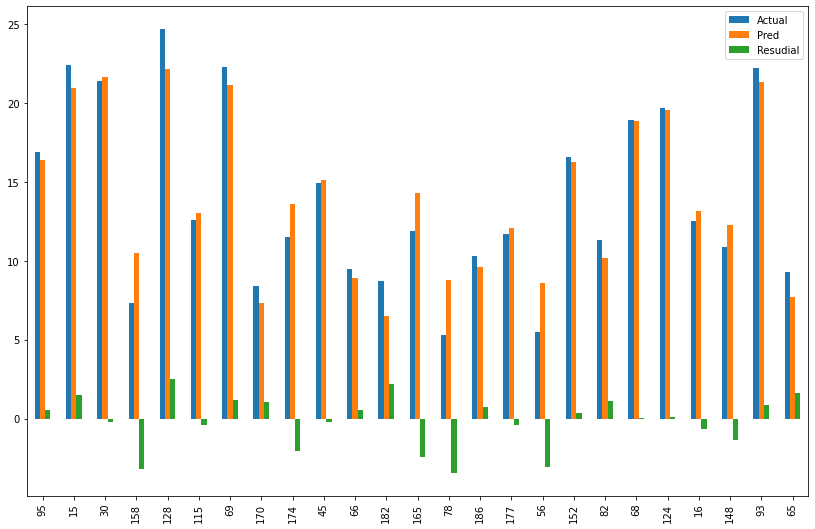

In [34]:
comparing.head(25).plot(kind = "bar", figsize=(14,9))
plt.show()
# ilk 25 değer için tahmin ve resudials arasında ki ilişkiyi grafiksel olarak göster dedik.

#### Future sayımız arttıkça r2 skorumuz artar.  bunu engellemek adına yazılan bir fonksiyon : 

Gözlem sayısını arttırmadan future sayısı artarsa datada yalancı bir iyileşme yaşanacaktır.

In [37]:
def adj_r2(y_test, y_pred, df):
    r2 = r2_score(y_test, y_pred)
    n = df.shape[0] # datamızdaki gözlem sayımız
    p = df.shape[1] - 1 # tüm değişkenlerin sayısı - target sutunu = bağımsız değişken sayımız
    adj_r2 = 1 - (1-r2)*(n-1)/(n-p-1) # yeni bir future ekliyorsak yeni gözlemde eklemek gerekir. 
    return adj_r2
# dummy future eklediğimiz zaman r2 skoru artar. bu fonksiyon bunu engellemek için. 

In [38]:
adj_r2(y_test, y_pred, df)
# burda yeni bir future eklemediğimiz için aynı r2 skoru verdi.

0.8918864799553917

### Overfitting Kontrol : 

In [39]:
y_pred_train = model.predict(X_train)
eval_metric(y_train, y_pred_train)

Model testing performance:
--------------------------
R2_score 	: 0.8966445527601498
MAE 		: 1.2156188847355553
MSE 		: 2.767891078046973
RMSE 		: 1.6636980128758263


In [40]:
eval_metric(y_test, y_pred)

Model testing performance:
--------------------------
R2_score 	: 0.8935163320163657
MAE 		: 1.4023124989385076
MSE 		: 2.8800237300941944
RMSE 		: 1.6970632663793634


In [41]:
# Kesinlikle Overfitting durumu yok skorlar dengeli.

### Grafikler ile Linear regresyona uygun mu : 
Normal Dağılım var mı veya yakın mı

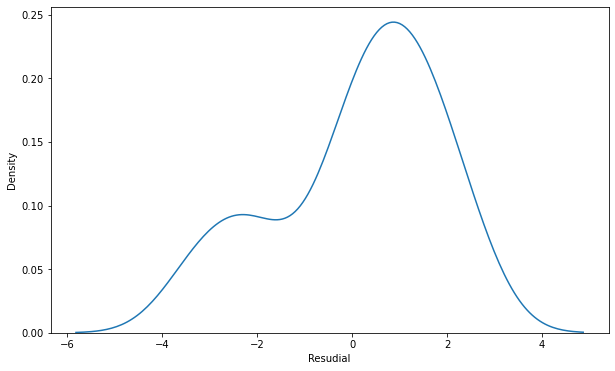

In [48]:
sns.kdeplot(x = comparing["Resudial"]);
# tahmin edilen değerlerin gerçek değerlerden genel olarak daha küçük olduğu yani genel itibariyle negatif olduğu görüldü.

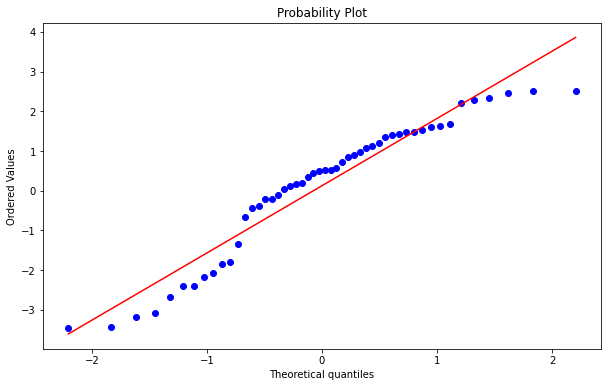

In [50]:
sts.probplot(comparing["Resudial"], dist="norm", plot=plt);
# buda farkların normal dağılıma yakın mı değil mi ona bakmak için stats içinde bulunan grafik kütüphanemiz.
# noktaların çizgiyi sarmaşık gibi sardığı görülmekte normal dağılıma yakın linear regressiona uygun diyebilriz.

In [51]:
sts.skew(comparing["Resudial"])
# zaten yukarıda kdeplot ile bakmıştık. hafif sola çarpık çıktı. 

-0.6524764477931668

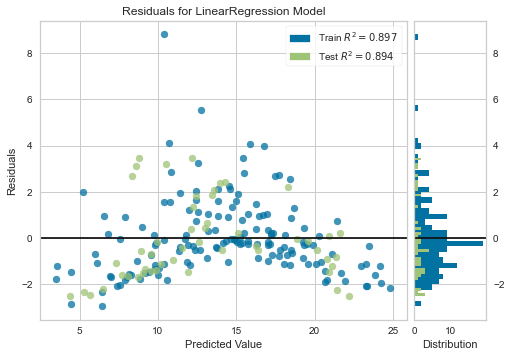

In [53]:
from yellowbrick.regressor import ResidualsPlot # gerçek değer ve tahmin arasında ki farklara bakmak için 

model = LinearRegression() # modeli sıfırladık.
visualizer = ResidualsPlot(model) # sonra modeli ResidualsPlot içine ekledik.
visualizer.fit(X_train, y_train) # train setini fit ettik
visualizer.score(X_test, y_test) # tüm test setinin skorunu aldık.
visualizer.show();

# train ve test seti için r2 scorlarımız tutarlı, normal dağılıma yakın.

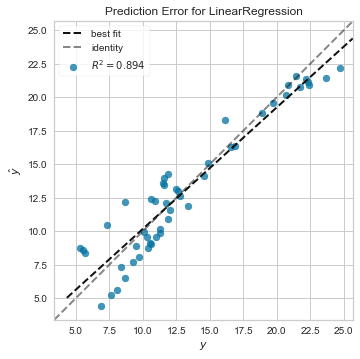

In [54]:
# yapılan tahminlerin hatalarını gösterelim
from yellowbrick.regressor import PredictionError

model = LinearRegression()
visualizer = PredictionError(model)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show();
# açık çizgiler tahminlerin doğru oldu yeri gösterir. yani koyu çizgi ve açık çizgi ne kadar üst üste binmişse o kadar güzel
# tahminleme yaptık demektir.

In [58]:
final_model = LinearRegression()
final_model.fit(X, y)
y_pred = final_model.predict(X)

In [59]:
eval_metric(y, y_pred)
# tüm data için başarımız %90 civarı r2 skorumuz. eldeki futureler tahmin için %90 oranında yeterli demektir.

Model testing performance:
--------------------------
R2_score 	: 0.8972106381789521
MAE 		: 1.2520112296870682
MSE 		: 2.7841263145109365
RMSE 		: 1.66857014072257
